In [ ]:
#Using MACD crossover strat to determine when a good time to buy and sell
#when MACD line is over singal shows it indicates a good time
#when the MACD is below the signal line it indicates a good time to sell

In [1]:
#import libs 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#upload csv 
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [3]:
#df 
df = pd.read_csv('AAPL.csv')
#show 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-17,36.385715,36.597141,35.387142,36.317142,31.439657,190708700
1,2010-05-18,36.711430,36.935715,35.751427,36.051430,31.209614,195669600
2,2010-05-19,35.642857,36.131428,34.978573,35.477142,30.712471,256431700
3,2010-05-20,34.554287,34.835712,33.744286,33.965714,29.404034,320728800
4,2010-05-21,33.259998,34.928570,33.049999,34.617142,29.967972,305972800
...,...,...,...,...,...,...,...
2513,2020-05-11,308.100006,317.049988,307.239990,315.010010,315.010010,36486600
2514,2020-05-12,317.829987,319.690002,310.910004,311.410004,311.410004,40575300
2515,2020-05-13,312.149994,315.950012,303.209991,307.649994,307.649994,50155600
2516,2020-05-14,304.510010,309.790009,301.529999,309.540009,309.540009,39732300


In [4]:
#change the index of the df to date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show new indexed df 
df

,Date,Open,High,Low,Close,Adj Close,Volume
2010-05-17,2010-05-17,36.385715,36.597141,35.387142,36.317142,31.439657,190708700
2010-05-18,2010-05-18,36.711430,36.935715,35.751427,36.051430,31.209614,195669600
2010-05-19,2010-05-19,35.642857,36.131428,34.978573,35.477142,30.712471,256431700
2010-05-20,2010-05-20,34.554287,34.835712,33.744286,33.965714,29.404034,320728800
2010-05-21,2010-05-21,33.259998,34.928570,33.049999,34.617142,29.967972,305972800
...,...,...,...,...,...,...,...
2020-05-11,2020-05-11,308.100006,317.049988,307.239990,315.010010,315.010010,36486600
2020-05-12,2020-05-12,317.829987,319.690002,310.910004,311.410004,311.410004,40575300
2020-05-13,2020-05-13,312.149994,315.950012,303.209991,307.649994,307.649994,50155600
2020-05-14,2020-05-14,304.510010,309.790009,301.529999,309.540009,309.540009,39732300


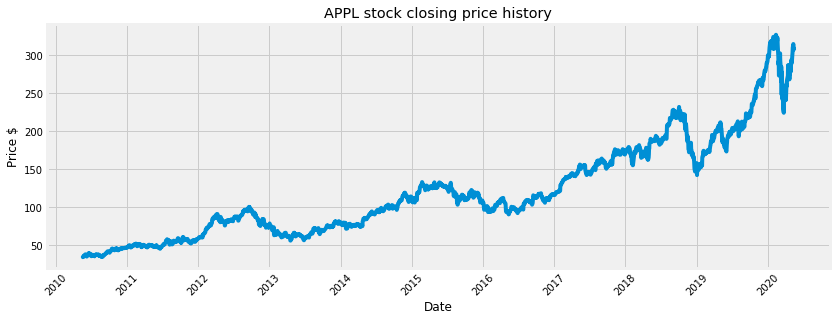

In [5]:
#visualise this data
#showing only the close price
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Close'], label = 'Close price')
plt.ylabel('Price $')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('APPL stock closing price history')
plt.show()

In [6]:
#calc MACD and signal line indicators
#short term expoential moveing avg 
shortEMA = df.Close.ewm(span=12,adjust=False).mean()
#long EMA
longEMA = df.Close.ewm(span=26,adjust=False).mean()
#MACD Line 
MACD = shortEMA - longEMA
#signal line 
signal = MACD.ewm(span=9,adjust=False).mean()

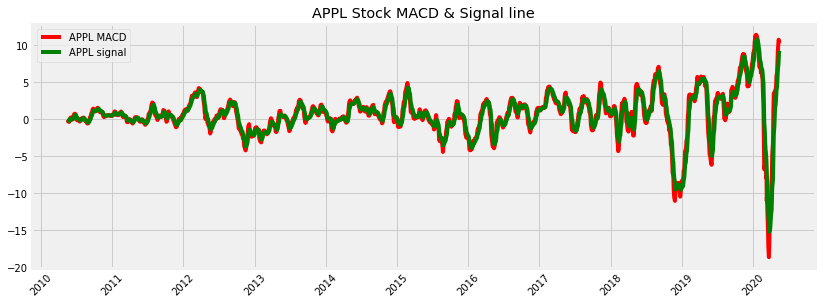

In [7]:
#plt MACD & Signal 
plt.figure(figsize=(12.5,4.5))
plt.title('APPL Stock MACD & Signal line')
plt.plot(df.index,MACD,label = 'APPL MACD',color='red')
plt.plot(df.index,signal,label ='APPL signal',color = 'green')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left')
plt.show()

In [8]:
#creating MACD & signal cols in the df 
df ['MACD'] = MACD
df ['Signal'] = signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
2010-05-17,2010-05-17,36.385715,36.597141,35.387142,36.317142,31.439657,190708700,0.000000,0.000000
2010-05-18,2010-05-18,36.711430,36.935715,35.751427,36.051430,31.209614,195669600,-0.021196,-0.004239
2010-05-19,2010-05-19,35.642857,36.131428,34.978573,35.477142,30.712471,256431700,-0.083374,-0.020066
2010-05-20,2010-05-20,34.554287,34.835712,33.744286,33.965714,29.404034,320728800,-0.251708,-0.066395
2010-05-21,2010-05-21,33.259998,34.928570,33.049999,34.617142,29.967972,305972800,-0.328760,-0.118868
...,...,...,...,...,...,...,...,...,...
2020-05-11,2020-05-11,308.100006,317.049988,307.239990,315.010010,315.010010,36486600,10.332243,7.416170
2020-05-12,2020-05-12,317.829987,319.690002,310.910004,311.410004,311.410004,40575300,10.736318,8.080200
2020-05-13,2020-05-13,312.149994,315.950012,303.209991,307.649994,307.649994,50155600,10.630606,8.590281
2020-05-14,2020-05-14,304.510010,309.790009,301.529999,309.540009,309.540009,39732300,10.577407,8.987706


In [9]:
#function which gives a buy or sell signal depending on MACD 
def shrt_lng(signal):
  buy = []
  short = []
  flag = -1

  for i in range (0,len(signal)):
    if signal['MACD'][i] > signal['Signal'][i]:
      short.append(np.nan)
      if flag !=1:
        buy.append(signal['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal'][i]:
      short.append(np.nan)
      if flag !=0:
        short.append(signal['Close'][i])
        flag = 0
      else:
          short.append(np.nan)
    else: 
      buy.append(np.nan) 
      short.append(np.nan)
  return (buy,short)


In [10]:
#create buy and sell signal
a = shrt_lng(df)
df['Buy_signal_price'] = a[0]
df['sell_signal_price'] = a[1]


ValueError: ignored

In [11]:
#selecting a range of data from the df based on the date
start_date = '2019-01-01'
end_date = '2019-06-01'
#setting mask filter
mask = (df['Date'] > start_date) & (df['Date']<= end_date)
df = df.loc[mask]
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
2019-01-02,2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700,-8.317349,-9.168506
2019-01-03,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200,-9.064050,-9.147615
2019-01-04,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100,-9.061563,-9.130404
2019-01-07,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800,-8.982674,-9.100858
2019-01-08,2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300,-8.593541,-8.999395
...,...,...,...,...,...,...,...,...,...
2019-05-24,2019-05-24,180.199997,182.139999,178.619995,178.970001,176.859283,23714700,-4.767906,-2.458403
2019-05-28,2019-05-28,178.919998,180.589996,177.910004,178.229996,176.128006,27948200,-5.162512,-2.999225
2019-05-29,2019-05-29,176.419998,179.350006,176.000000,177.380005,175.288025,28481200,-5.480649,-3.495510
2019-05-30,2019-05-30,177.949997,179.229996,176.669998,178.300003,176.197189,21218400,-5.594054,-3.915218


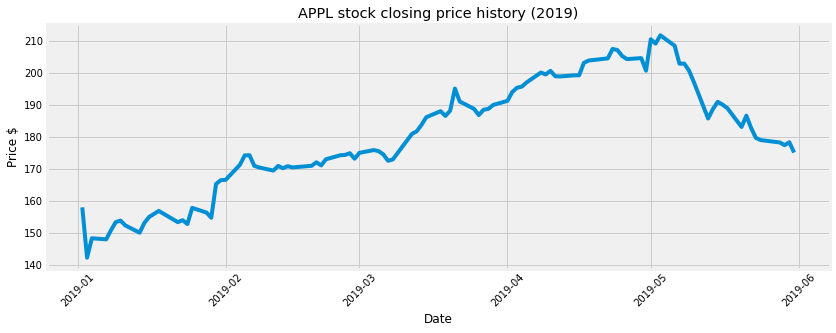

In [12]:
#plot new df
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Close'], label = 'Close price')
plt.ylabel('Price $')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('APPL stock closing price history (2019)')
plt.show()